<a href="https://colab.research.google.com/github/KiloDragon/HWinn/blob/main/Attestation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем датасет из gita

In [234]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
import functools
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from google.colab import files
from matplotlib.pyplot import figure
pd.options.mode.chained_assignment = None
url = 'https://raw.githubusercontent.com/KiloDragon/HWinn/main/dataset_tk.csv'

df_energy = pd.read_csv(url)
df_energy.rename(columns={"Unnamed: 0":"Date"},inplace=True)

df_energy['Date']=pd.to_datetime(df_energy["Date"],dayfirst=True)
df_energy["day"]=df_energy["Date"].dt.day
df_energy["month"]=df_energy["Date"].dt.month
df_energy["year"]=df_energy["Date"].dt.year
df_energy.drop(["Date"],axis=1,inplace=True)

cols = df_energy.columns.tolist()
cols = cols[-3:] + cols[:-3]
df_energy = df_energy[cols]
df_energy.head(5)

,day,month,year,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2,1,2019,119.9,130.3,234.1,85.8,313.9,40.7,30.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,3,1,2019,121.9,133.5,240.2,85.5,311.8,39.3,30.1,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,4,1,2019,118.8,128.2,239.8,83.5,320.7,38.1,30.1,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,5,1,2019,121.0,127.5,239.1,79.2,299.0,39.2,30.2,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,6,1,2019,121.4,132.6,240.4,76.6,286.8,39.2,31.0,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


Анализируем данные


In [235]:
features=df_energy.columns.tolist()
del features[0:3]
df_energy.isnull().sum()

day                  0
month                0
year                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

In [236]:
duplicateRows = df_energy[df_energy.duplicated()]
duplicateRows
#Дубликатов и пустых значений не найдено

,day,month,year,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura


In [237]:
print(df_energy[features].describe())

           Punjab     Haryana   Rajasthan       Delhi          UP  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean   141.145527  138.333598  218.443340   83.380716  314.036382   
std     56.977361   38.106593   27.421615   25.915357   66.516960   
min     56.100000   64.800000  105.800000   41.800000  186.800000   
25%    104.000000  114.800000  205.800000   63.500000  263.650000   
50%    118.300000  126.800000  222.900000   72.700000  290.000000   
75%    162.500000  158.100000  237.600000  105.800000  370.550000   
max    300.000000  237.200000  278.000000  147.100000  471.800000   

       Uttarakhand          HP         J&K  Chandigarh  Chhattisgarh  ...  \
count   503.000000  503.000000  503.000000  503.000000    503.000000  ...   
mean     36.157058   26.568191   44.264016    4.141551     83.877137  ...   
std       6.705108    4.807040    4.769391    1.143422     10.130427  ...   
min      16.800000   11.800000   17.800000    2.200000     37.200000  

Проверим на наличие выбросов

In [238]:
z = np.abs(stats.zscore(df_energy[features]))
data_clean = df_energy[features][(z<3).all(axis=1)]

print(data_clean.shape)
print(df_energy[features].shape)
data_clean = data_clean.join(df_energy[['day','month','year']])

(440, 33)
(503, 33)


Видно что 63 строки имеют значение больше чем 3 стандартных отклонения

In [239]:
clean=data_clean[features].mean().sort_values(ascending=False)
initial=df_energy[features].mean().sort_values(ascending=False)
order_mean=clean.index.values.tolist()
print(clean,initial)

Maharashtra          434.943636
Gujarat              328.635227
UP                   318.420909
Tamil Nadu           304.828409
Rajasthan            223.572273
MP                   211.790682
Karnataka            203.659773
Telangana            188.587727
Andhra Pradesh       177.209773
Punjab               146.209545
Haryana              142.801364
West Bengal          139.955227
Delhi                 85.666818
Chhattisgarh          84.595000
Bihar                 83.724318
Odisha                81.015000
Kerala                72.341364
J&K                   44.636136
Uttarakhand           37.379318
HP                    27.616136
Assam                 25.479318
Jharkhand             23.975682
DNH                   17.505682
Goa                   11.315455
Pondy                  7.670227
Meghalaya              5.790000
Chandigarh             4.267727
Tripura                4.141136
Manipur                2.522273
Nagaland               2.168636
Arunachal Pradesh      2.155909
Mizoram 

Видно что в целом исключение выбросов не сильно повлияло на расстановку штатов по среднему за весь период электропотреблению. Посмотрим на средние, максимальные значения в разрезе годов и визуализируем данные.**Далее будем использовать данные без выбросов**


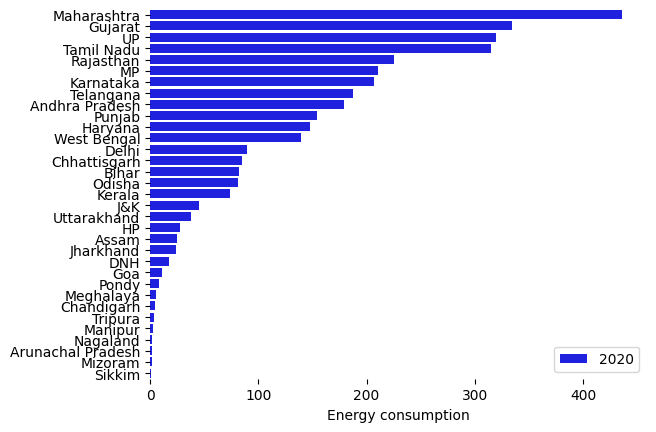

In [240]:
cols_clean = df_energy.columns.tolist()
cols_clean = cols[-3:] + cols[:-3]
data_clean = data_clean[cols]
yearly=data_clean.groupby('year').mean()

f, ax = plt.subplots()
sns.barplot(data=yearly.iloc[1:,2:],
            label="2020", color="b",orient='h',order=order_mean)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Energy consumption")
sns.despine(left=True, bottom=True)

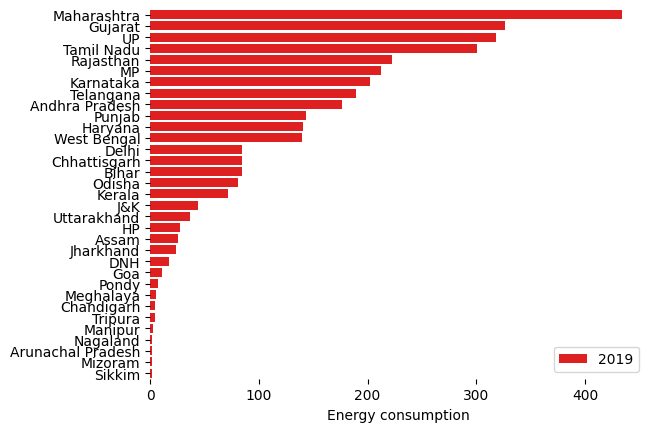

In [241]:
f, ax = plt.subplots()
sns.barplot(data=yearly.iloc[:1,2:],
            label="2019", color="r",orient='h',order=order_mean)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Energy consumption")
sns.despine(left=True, bottom=True)

Видно из графиков что топ-5 штатов по потреблению энергии не поменялся от года к году. Проверим как  менялось потребление по месяцам в году.

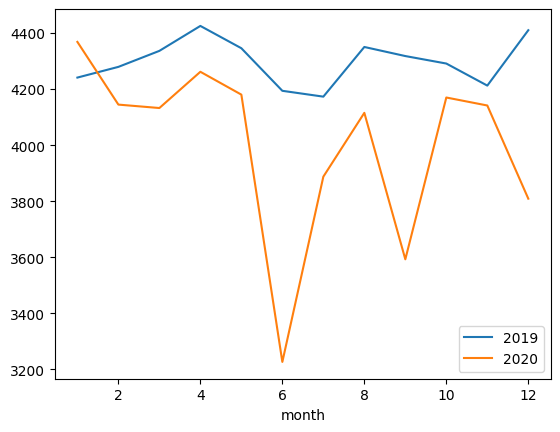

In [242]:
data_yearl_month=pd.pivot_table(data_clean,
               index=["year",'month'],aggfunc=np.max)

data_2019=data_yearl_month.query('year == 2019')
data_2020=data_yearl_month.query('year == 2020')
data_2019=data_2019.groupby('month').sum().sum(axis=1)
data_2020=data_2020.groupby('month').sum().sum(axis=1)
data_2019.plot(x='month',y='energy',label="2019")
data_2020.plot(x='month',y='energy',label="2020")
plt.legend(loc='lower right')

<function matplotlib.pyplot.show(close=None, block=None)>

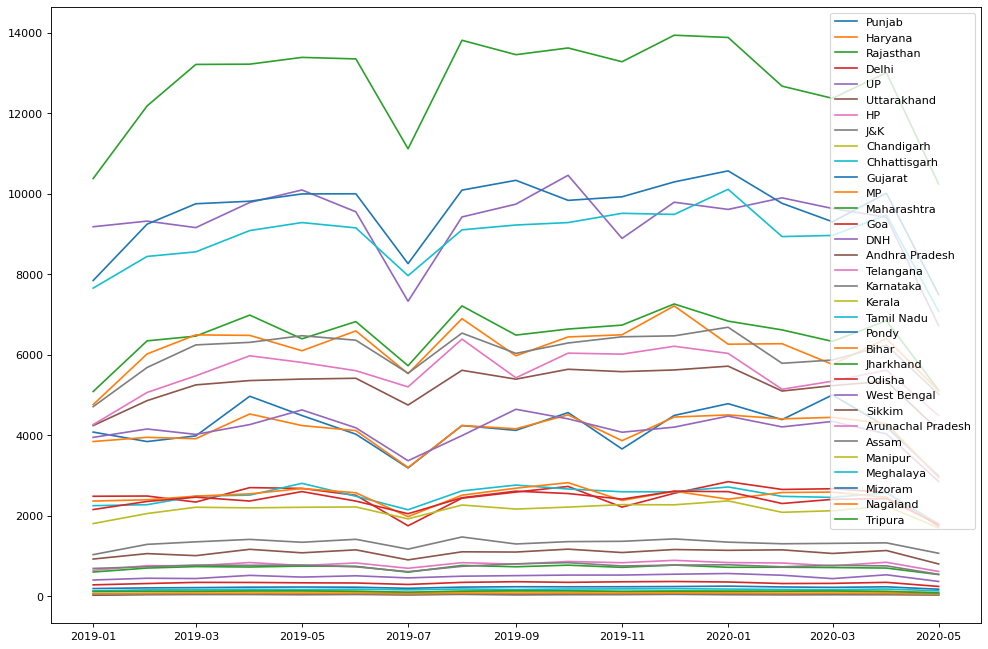

In [243]:
df_energy_orig = pd.read_csv(url)
df_energy_orig.rename(columns={"Unnamed: 0":"Date"},inplace=True)
figure(figsize=(15, 10), dpi=80)
ax = plt.subplot()
df_energy_orig['Date']=pd.to_datetime(df_energy_orig['Date'])
df_energy_orig.set_index('Date', inplace=True)
data_resample=df_energy_orig.resample('MS').sum()
data_resample.reset_index(inplace=True)
plt.plot(data_resample['Date'], data_resample[features])
plt.legend(data_resample[features])

plt.show

Относительно 2019 года , в 2020 году максимальные потрдения электроэнергии ниже. При этом в 2020 наибольший пик снижения приходится на июнь-июль. **Предположение 1** **Как предположение можно выделить что коронавирусные ограничения повлияли как на максимальное годовое потребление электроэнергии, так и на пик в июне на который пришлась максимальный эффект от изоляции в Индии**

Для дополнительного анализа воспользуемся 2 датасетом в наборе с положением штатов. И определим положение последних по потреблению штатов.

<function matplotlib.pyplot.show(close=None, block=None)>

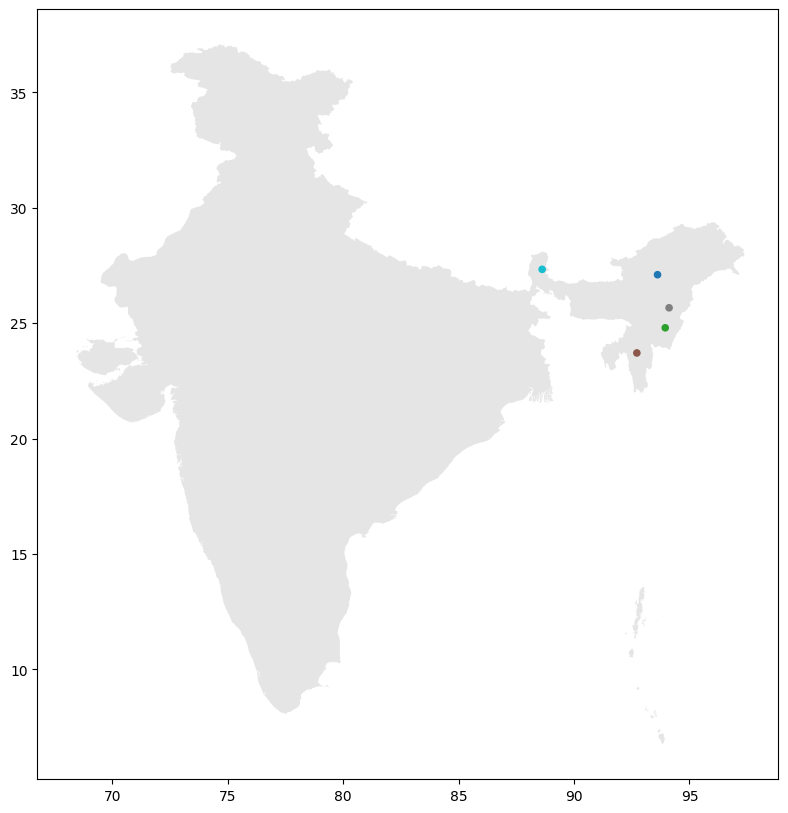

In [244]:
url2 = 'https://raw.githubusercontent.com/KiloDragon/HWinn/main/long_data_.csv'

df_location = pd.read_csv(url2)
df_location = df_location.iloc[:,:4]

bot_5=clean.nsmallest(n=5, keep='first')
bot_5=bot_5.index.values.tolist()
map_df=gpd.read_file('india-osm.geojson')
map_df=gpd.GeoDataFrame(map_df)
ax_all=map_df.plot(figsize=(14,10), color='black', alpha=0.1)
df_location_coor = df_location.drop_duplicates()
bot_5=pd.DataFrame(bot_5,columns=['States'])

df_location_coor['coordinates'] = df_location_coor[['longitude' , 'latitude']].values.tolist()
df_location_coor['coordinates'] = df_location_coor['coordinates'].apply(Point)
bot_5 = bot_5.merge(df_location_coor)
bot_5 = gpd.GeoDataFrame(bot_5, geometry='coordinates')
bot_5.plot(ax=ax_all, column = 'States',markersize=20,marker='o')
plt.show

**Преположение 2 Посмотрев на географическое расположение последних по потребрению штатов, можно увидеть что это северные малонаселенные горные регионы с слоборазвитой промышленностью.**